ADVANCED TOPICS IN MACHINE LEARNING

Assignment - 1

Ιπποκράτης Κοτσάνης - 131

Φιλίτσα-Ιωάννα Κουσκουβέλη - 125



----------------------------------------------------------------------------------------------------------------------------------------------------------------
PART A


Random Forest - Model



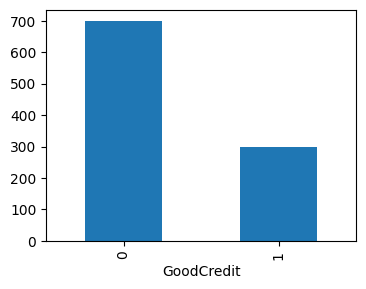

=========RANDOM FOREST========
RandomForestClassifier(max_depth=10)
Classification_repor:                precision    recall  f1-score   support

           0       0.81      0.89      0.85       214
           1       0.64      0.49      0.55        86

    accuracy                           0.77       300
   macro avg       0.72      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

Confusion_matrix:  [[190  24]
 [ 44  42]]
244
Accuracy of the model on Testing Sample Data: 0.76

Accuracy values for 10-fold Cross Validation:
 [0.81711042 0.72867133 0.72238245 0.75652174 0.76987902 0.75128205
 0.69011858 0.81711042 0.75256116 0.72702703]

Final Average Accuracy of the model: 0.75


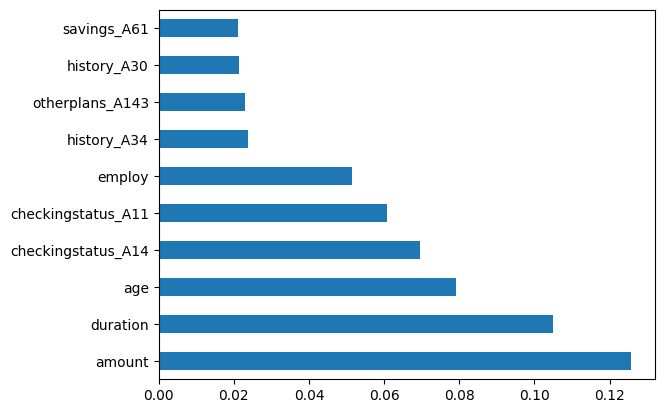

===== END - RANDOM FOREST ====


In [ ]:
# Project 1
# Section - A - German credit Card

# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

CreditRiskData = pd.read_csv("/content/CreditRiskData.csv", encoding='latin')
df = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# ======================================================================================================= #
# ======================================================================================================= #
# ====================================== RANDOM FOREST ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #
print("==============================")
print("=========RANDOM FOREST========")
print("==============================")


# Random Forest (Bagging of multiple Decision Trees)
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF = clf.fit(X_train, y_train)
prediction = RF.predict(X_test)

# Measuring accuracy on Testing Data


print("Classification_report: ", metrics.classification_report(y_test, prediction))
conf_m = metrics.confusion_matrix(y_test, prediction)
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

print("==============================")
print("===== END - RANDOM FOREST ====")
print("==============================")

**Comments:**

As we know from dataset class zero (0) is a good credit customer and class one (1) is a bad credit customer.

Also, it is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1) regarding cost matrix.

Regarding random forest when we apply it in dataset we can see that cost is 244.
Also from confusion matrix we can consider that the false negatives predictions are 44 that means 14,66% from total predictions.

Linear SVM - Model

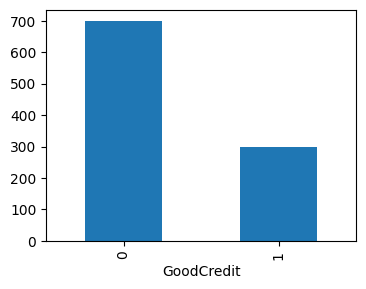

========== LINEAR SVM ========
SVC(kernel='linear', probability=True)
Classification_report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       214
           1       0.58      0.50      0.54        86

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.74      0.75      0.75       300

Confusion_matrix:  [[183  31]
 [ 43  43]]
246
Accuracy of the model on Testing Sample Data: 0.75
===== END - LINEAR SVM =======


In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics, svm
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

#print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# ======================================================================================================= #
# ======================================================================================================= #
# ======================================= LINEAR SVM ==================================================== #
# ======================================================================================================= #
# ======================================================================================================= #
print("==============================")
print("========== LINEAR SVM ========")
print("==============================")

SVM = SVC(kernel='linear', probability=True)

# Printing all the parameters of SVM
print(SVM)

model = SVM.fit(X_train, y_train)
prediction = model.predict(X_test)

# Measuring accuracy on Testing Data
print("Classification_report: ", metrics.classification_report(y_test, prediction, zero_division=0))
conf_m = metrics.confusion_matrix(y_test, prediction)
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test
# Accuracy_Values = cross_val_score(SVM, X, y, cv=10, scoring='f1_weighted')
# print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
# print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

print("==============================")
print("===== END - LINEAR SVM =======")
print("==============================")

**Comments:**

As we can see from confusion matrix the accuracy and cost in linear SVM model is approximately the same with random forest.

Naive Bayes - Model

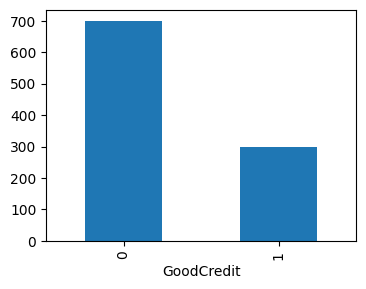

========= Naive Bayes ========
GaussianNB()
Classification_report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.60      0.54        86

    accuracy                           0.71       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.73      0.71      0.72       300

Confusion_matrix:  [[161  53]
 [ 34  52]]
223
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.72923077 0.71751767 0.72       0.71578348 0.74230949 0.77295794
 0.65405405 0.73347237 0.75321515 0.76553596]

Final Average Accuracy of the model: 0.73
=====END - Naive Bayes =======


In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# ======================================================================================================= #
# ======================================================================================================= #
# ======================================= Naive Bayes =================================================== #
# ======================================================================================================= #
# ======================================================================================================= #
print("==============================")
print("========= Naive Bayes ========")
print("==============================")

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB = clf.fit(X_train, y_train)
prediction = NB.predict(X_test)

# Measuring accuracy on Testing Data
print("Classification_report: ", metrics.classification_report(y_test, prediction))
conf_m = metrics.confusion_matrix(y_test, prediction)
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))

# Printing the Overall Accuracy of the model
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(NB, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

print("==============================")
print("=====END - Naive Bayes =======")
print("==============================")

**Comments:**

Naive Bayes model has the best performance regarding cost prediction in comparison with the two other models.

RANDOM FOREST - Minimizing the expected cost

========= RANDOM FOREST - Minimizing the expected cost ========


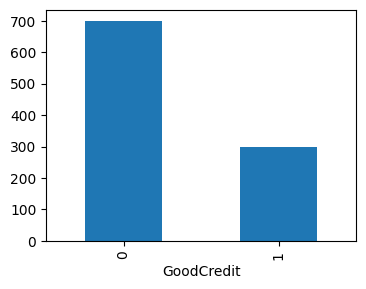

RandomForestClassifier(max_depth=10)
no cost minimization
Classification_report:                precision    recall  f1-score   support

           0       0.79      0.91      0.84       214
           1       0.63      0.40      0.49        86

    accuracy                           0.76       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300

Confusion_matrix:  [[194  52]
 [ 20  34]]
152

 cost minimization without probability calibration
Classification_report:                precision    recall  f1-score   support

           0       0.71      1.00      0.83       214
           1       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

Confusion_matrix:  [[214  86]
 [  0   0]]
86

 cost minimization with sigmoid calibration
Classification_report:                precision    r

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# ======================================================================================================= #
# ======================================================================================================= #
# ======================== RANDOM FOREST - Minimizing the expected cost ================================= #
# ======================================================================================================= #
# ======================================================================================================= #
print("===============================================================")
print("========= RANDOM FOREST - Minimizing the expected cost ========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df1 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Random Forest (Bagging of multiple Decision Trees)
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# =================== No cost minimization ======================= #
print("no cost minimization")
model = clf.fit(X_train, y_train)
y_pred_1 = model.predict(X_test)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_1))

conf_m = metrics.confusion_matrix(y_test, y_pred_1).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization without probability calibration ======== #
print("\n cost minimization without probability calibration")
model = clf.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
y_pred_2 = np.argmin(np.matmul(y_pred_prob, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_2, zero_division=0))
conf_m = metrics.confusion_matrix(y_test, y_pred_2).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== cost minimization with sigmoid calibration ============== #
print("\n cost minimization with sigmoid calibration")
cc = CalibratedClassifierCV(clf, method="sigmoid", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_sigmoid = model.predict_proba(X_test)
y_pred_3 = np.argmin(np.matmul(y_pred_prob_sigmoid, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_3))
conf_m = metrics.confusion_matrix(y_test, y_pred_3).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization with isotonic calibration =============== #
print("\n cost minimization with isotonic calibration")
cc = CalibratedClassifierCV(clf, method="isotonic", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_isotonic = model.predict_proba(X_test)
y_pred_4 = np.argmin(np.matmul(y_pred_prob_isotonic, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_4))
conf_m = metrics.confusion_matrix(y_test, y_pred_4).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #


# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - No cost minimization
F1_Score = metrics.f1_score(y_test, y_pred_1, average='weighted')
print('Accuracy of the model on Testing Sample Data(No cost minimization):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization without probability calibration
F1_Score = metrics.f1_score(y_test, y_pred_2, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization without probability calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - cost minimization with sigmoid calibration
F1_Score = metrics.f1_score(y_test, y_pred_3, average='weighted')
print('Accuracy of the model on Testing Sample Data(cost minimization with sigmoid calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization with isotonic calibration
F1_Score = metrics.f1_score(y_test, y_pred_4, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization with isotonic calibration):', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

print("===============================================================")
print("======END - RANDOM FOREST - Minimizing the expected cost ======")
print("===============================================================")

**Comments:**

When we apply minimize expected cost technique in random forest we can see a high improvement in cost. From 152 it drops to 86 without probability calibration. Same results we have also with sigmoid and isotonic calibration. Thus, we can understand that this techinique has minimized the expected cost significantly!

LINEAR SVM - Minimizing the expected cost

========= LINEAR SVM - Minimizing the expected cost ===========


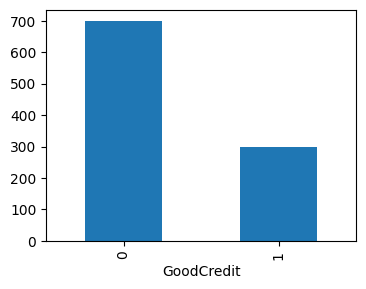

SVC(kernel='linear', probability=True)
no cost minimization
Classification_report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       214
           1       0.58      0.50      0.54        86

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.74      0.75      0.75       300

Confusion_matrix:  [[183  43]
 [ 31  43]]
198

 cost minimization without probability calibration
Classification_report:                precision    recall  f1-score   support

           0       0.71      0.99      0.83       214
           1       0.33      0.01      0.02        86

    accuracy                           0.71       300
   macro avg       0.52      0.50      0.43       300
weighted avg       0.60      0.71      0.60       300

Confusion_matrix:  [[212  85]
 [  2   1]]
95

 cost minimization with sigmoid calibration
Classification_report:                precision   

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= LINEAR SVM - Minimizing the expected cost ===========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df2 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Support Vector Machines(SVM)
clf = SVC(kernel='linear', probability=True)

# Printing all the parameters of SVM
print(clf)

# =================== No cost minimization ======================= #
print("no cost minimization")
model = clf.fit(X_train, y_train)
y_pred_1 = model.predict(X_test)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_1))

conf_m = metrics.confusion_matrix(y_test, y_pred_1).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization without probability calibration ======== #
print("\n cost minimization without probability calibration")
model = clf.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
y_pred_2 = np.argmin(np.matmul(y_pred_prob, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_2, zero_division=0))
conf_m = metrics.confusion_matrix(y_test, y_pred_2).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== cost minimization with sigmoid calibration ============== #
print("\n cost minimization with sigmoid calibration")
cc = CalibratedClassifierCV(clf, method="sigmoid", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_sigmoid = model.predict_proba(X_test)
y_pred_3 = np.argmin(np.matmul(y_pred_prob_sigmoid, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_3))
conf_m = metrics.confusion_matrix(y_test, y_pred_3).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization with isotonic calibration =============== #
print("\n cost minimization with isotonic calibration")
cc = CalibratedClassifierCV(clf, method="isotonic", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_isotonic = model.predict_proba(X_test)
y_pred_4 = np.argmin(np.matmul(y_pred_prob_isotonic, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_4))
conf_m = metrics.confusion_matrix(y_test, y_pred_4).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #


# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - No cost minimization
F1_Score = metrics.f1_score(y_test, y_pred_1, average='weighted')
print('Accuracy of the model on Testing Sample Data(No cost minimization):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization without probability calibration
F1_Score = metrics.f1_score(y_test, y_pred_2, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization without probability calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - cost minimization with sigmoid calibration
F1_Score = metrics.f1_score(y_test, y_pred_3, average='weighted')
print('Accuracy of the model on Testing Sample Data(cost minimization with sigmoid calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization with isotonic calibration
F1_Score = metrics.f1_score(y_test, y_pred_4, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization with isotonic calibration):', round(F1_Score, 2))

# # Running 10-Fold Cross validation on a given algorithm
# # Passing full data X and y because the K-fold will split the data and automatically choose train/test
# Accuracy_Values = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')
# print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
# print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

print("===============================================================")
print("======END - LINEAR SVM - Minimizing the expected cost =========")
print("===============================================================")

**Comments:**

We can make the same considerations with random forest for linear SVM! We have a high cost minimization too. Cost from 195 drops to 91. Also, we have a dicrease in accuracy regarding sigmoid and isotonic calibration, but we care mostly about cost.

NAIVE BAYES - Minimizing the expected cost

========= NAIVE BAYES - Minimizing the expected cost ==========


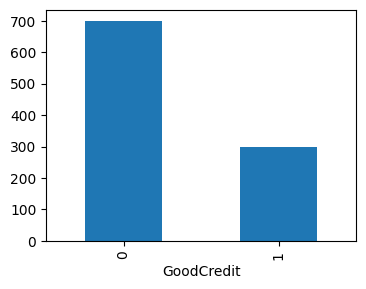

GaussianNB()
no cost minimization
Classification_report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.60      0.54        86

    accuracy                           0.71       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.73      0.71      0.72       300

Confusion_matrix:  [[161  34]
 [ 53  52]]
299

 cost minimization without probability calibration
Classification_report:                precision    recall  f1-score   support

           0       0.79      0.82      0.81       214
           1       0.51      0.45      0.48        86

    accuracy                           0.72       300
   macro avg       0.65      0.64      0.64       300
weighted avg       0.71      0.72      0.71       300

Confusion_matrix:  [[176  47]
 [ 38  39]]
237

 cost minimization with sigmoid calibration
Classification_report:                precision    recall  f1-score   suppo

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Accuracy values for 10-fold Cross Validation:
 [0.76351097 0.72702703 0.70133333 0.71859838 0.68       0.77781287
 0.60382775 0.71388889 0.71433083 0.76533333]

Final Average Accuracy of the model: 0.72
======END - NAIVE BAYES - Minimizing the expected cost ========


In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= NAIVE BAYES - Minimizing the expected cost ==========")
print("===============================================================")
CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df3 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

# =================== No cost minimization ======================= #
print("no cost minimization")
model = clf.fit(X_train, y_train)
y_pred_1 = model.predict(X_test)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_1))

conf_m = metrics.confusion_matrix(y_test, y_pred_1).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization without probability calibration ======== #
print("\n cost minimization without probability calibration")
model = clf.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)
y_pred_2 = np.argmin(np.matmul(y_pred_prob, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_2, zero_division=0))
conf_m = metrics.confusion_matrix(y_test, y_pred_2).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== cost minimization with sigmoid calibration ============== #
print("\n cost minimization with sigmoid calibration")
cc = CalibratedClassifierCV(clf, method="sigmoid", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_sigmoid = model.predict_proba(X_test)
y_pred_3 = np.argmin(np.matmul(y_pred_prob_sigmoid, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_3))
conf_m = metrics.confusion_matrix(y_test, y_pred_3).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #

# ===== Cost minimization with isotonic calibration =============== #
print("\n cost minimization with isotonic calibration")
cc = CalibratedClassifierCV(clf, method="isotonic", cv=3)
model = cc.fit(X_train, y_train)
y_pred_prob_isotonic = model.predict_proba(X_test)
y_pred_4 = np.argmin(np.matmul(y_pred_prob_isotonic, np.array(cost_m).T), axis=1)
print("Classification_report: ",
      metrics.classification_report(y_test, y_pred_4))
conf_m = metrics.confusion_matrix(y_test, y_pred_4).T  # transpose to align with slides
print("Confusion_matrix: ", conf_m)
print(np.sum(conf_m * cost_m))
# ================================================================ #


# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - No cost minimization
F1_Score = metrics.f1_score(y_test, y_pred_1, average='weighted')
print('Accuracy of the model on Testing Sample Data(No cost minimization):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization without probability calibration
F1_Score = metrics.f1_score(y_test, y_pred_2, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization without probability calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - cost minimization with sigmoid calibration
F1_Score = metrics.f1_score(y_test, y_pred_3, average='weighted')
print('Accuracy of the model on Testing Sample Data(cost minimization with sigmoid calibration):', round(F1_Score, 2))

# Measuring accuracy on Testing Data
# Printing the Overall Accuracy of the model - Cost minimization with isotonic calibration
F1_Score = metrics.f1_score(y_test, y_pred_4, average='weighted')
print('Accuracy of the model on Testing Sample Data(Cost minimization with isotonic calibration):', round(F1_Score, 2))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(model, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

print("===============================================================")
print("======END - NAIVE BAYES - Minimizing the expected cost ========")
print("===============================================================")

**Comments:**

Same with the two previous models, in naive bayes model we have a high improvement regarding cost.

Aslo, if we do a comparison between the 3 models we understand that "minimize expected cost" technique has the best results with naive bayes model.

RANDOM FOREST - Sampling

========= RANDOM FOREST - Sampling ============================


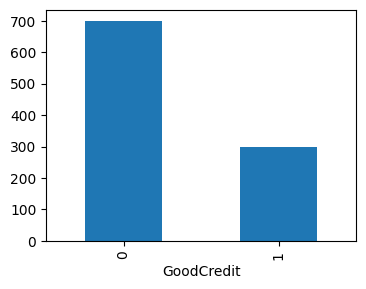

RandomForestClassifier(max_depth=10)
without sampling
Counter({0: 486, 1: 214})
Classification_report:                precision    recall  f1-score   support

           0       0.79      0.91      0.85       214
           1       0.65      0.41      0.50        86

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.67       300
weighted avg       0.75      0.77      0.75       300

[[195  51]
 [ 19  35]]
146

with undersampling
Counter({1: 214, 0: 100})
Classification_report:                precision    recall  f1-score   support

           0       0.92      0.39      0.55       214
           1       0.38      0.92      0.53        86

    accuracy                           0.54       300
   macro avg       0.65      0.65      0.54       300
weighted avg       0.77      0.54      0.54       300

[[ 83   7]
 [131  79]]
662

with oversampling
Counter({1: 486, 0: 486})
Classification_report:                precision    recall  f1-score   sup

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (250) in class 0 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (300) in class 1 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(


Classification_report:                precision    recall  f1-score   support

           0       0.87      0.64      0.74       214
           1       0.46      0.77      0.57        86

    accuracy                           0.67       300
   macro avg       0.67      0.70      0.65       300
weighted avg       0.75      0.67      0.69       300

[[136  20]
 [ 78  66]]
410

======END - RANDOM FOREST - Minimizing the expected cost ======


In [ ]:
# Imports
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler


# ======================================================================================================= #
# ======================================================================================================= #
# ======================== RANDOM FOREST - Sampling ===================================================== #
# ======================================================================================================= #
# ======================================================================================================= #
print("===============================================================")
print("========= RANDOM FOREST - Sampling ============================")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df1 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Random Forest (Bagging of multiple Decision Trees)
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

print("without sampling")
print(Counter(y_train))
# 0: 486, 1: 214

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with undersampling")
# change the examples of class 1 to see what happens
sampler = RandomUnderSampler(sampling_strategy={0: 100, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model1 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with oversampling")
# change the examples of class 1 to see what happens
sampler = RandomOverSampler(sampling_strategy={0: 486, 1: 486}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model2 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with combination")
sampler = RandomUnderSampler(sampling_strategy={0: 200, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
sampler = RandomOverSampler(sampling_strategy={0: 250, 1: 300}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_rs, y_rs)
print(Counter(y_rs))

model3 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - RANDOM FOREST - Minimizing the expected cost ======")
print("===============================================================")

**Comments:**

Regarding sampling method in Random forest model, at first without sampling we have cost 146. In case we apply undersampling method in our model we can consider that the cost increases at 662. That happens because we reduce our samples in dataset and during training our model doesn't have enough samples to make good predictions. Also we would expect this behaviour as theory says.

Other than that, during oversampling method we have better results in comparison with undersampling but in general we have not a cost minimization!Same results with combination of these 2 methods.

So we can understand that sampling method in Random forest doesn't provide a better cost.


LINEAR SVM - Sampling

========= LINEAR SVM - Minimizing the expected cost ===========


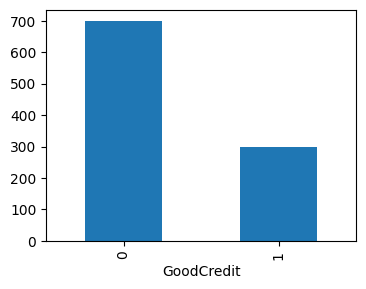

SVC(kernel='linear', probability=True)
without sampling
Counter({0: 486, 1: 214})
Classification_report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       214
           1       0.58      0.50      0.54        86

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.74      0.75      0.75       300

[[183  43]
 [ 31  43]]
198

with undersampling
Counter({1: 214, 0: 100})
Classification_report:                precision    recall  f1-score   support

           0       0.88      0.50      0.64       214
           1       0.40      0.83      0.54        86

    accuracy                           0.60       300
   macro avg       0.64      0.67      0.59       300
weighted avg       0.74      0.60      0.61       300

[[108  15]
 [106  71]]
545

with oversampling
Counter({1: 486, 0: 486})
Classification_report:                precision    recall  f1-score   s

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (250) in class 0 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (300) in class 1 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(


Classification_report:                precision    recall  f1-score   support

           0       0.88      0.64      0.74       214
           1       0.47      0.78      0.58        86

    accuracy                           0.68       300
   macro avg       0.67      0.71      0.66       300
weighted avg       0.76      0.68      0.70       300

[[137  19]
 [ 77  67]]
404

======END - LINEAR SVM - Sampling =============================


In [ ]:
# Imports
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= LINEAR SVM - Minimizing the expected cost ===========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df2 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Support Vector Machines(SVM)
clf = SVC(kernel='linear', probability=True)

# Printing all the parameters of SVM
print(clf)

print("without sampling")
print(Counter(y_train))
# 0: 486, 1: 214

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with undersampling")
# change the examples of class 1 to see what happens
sampler = RandomUnderSampler(sampling_strategy={0: 100, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model1 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with oversampling")
# change the examples of class 1 to see what happens
sampler = RandomOverSampler(sampling_strategy={0: 486, 1: 486}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model2 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with combination")
sampler = RandomUnderSampler(sampling_strategy={0: 200, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
sampler = RandomOverSampler(sampling_strategy={0: 250, 1: 300}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_rs, y_rs)
print(Counter(y_rs))

model3 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - LINEAR SVM - Sampling =============================")
print("===============================================================")

**Comments:**

We have same results with Random forest model here! Sampling method doesn't provide an inmprovement in cost.


NAIVE BAYES - Sampling

========= LINEAR SVM - Minimizing the expected cost ===========


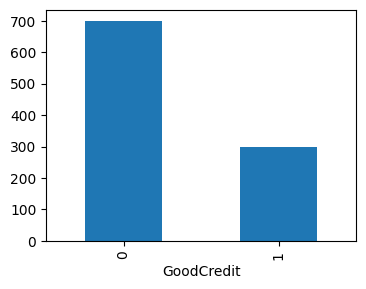

GaussianNB()
without sampling
Counter({0: 486, 1: 214})
Classification_report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.60      0.54        86

    accuracy                           0.71       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.73      0.71      0.72       300

[[161  34]
 [ 53  52]]
299

with undersampling
Counter({1: 214, 0: 100})
Classification_report:                precision    recall  f1-score   support

           0       0.88      0.67      0.76       214
           1       0.49      0.78      0.60        86

    accuracy                           0.70       300
   macro avg       0.69      0.73      0.68       300
weighted avg       0.77      0.70      0.72       300

[[144  19]
 [ 70  67]]
369

with oversampling
Counter({1: 486, 0: 486})
Classification_report:                precision    recall  f1-score   support

           0      

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (250) in class 0 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (300) in class 1 will be larger than the number of samples in the majority class (class #1 -> 214)
  warnings.warn(


In [ ]:
# Imports
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= LINEAR SVM - Minimizing the expected cost ===========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df2 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

print("without sampling")
print(Counter(y_train))
# 0: 486, 1: 214

model = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with undersampling")
# change the examples of class 1 to see what happens
sampler = RandomUnderSampler(sampling_strategy={0: 100, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model1 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with oversampling")
# change the examples of class 1 to see what happens
sampler = RandomOverSampler(sampling_strategy={0: 486, 1: 486}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print(Counter(y_rs))

model2 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("with combination")
sampler = RandomUnderSampler(sampling_strategy={0: 200, 1: 214}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
sampler = RandomOverSampler(sampling_strategy={0: 250, 1: 300}, random_state=1)
X_rs, y_rs = sampler.fit_resample(X_rs, y_rs)
print(Counter(y_rs))

model3 = clf.fit(X_rs, y_rs)
y_pred = clf.predict(X_test)

print("Classification_report: ", classification_report(y_test, y_pred))
conf_m = confusion_matrix(y_test, y_pred).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - NAIVE BAYES - Sampling ============================")
print("===============================================================")

**Comments:**

We have same results with Random forest and Linear SVM models here! Sampling method doesn't provide an improvement in cost.


**In General:**

Sampling method as we can see from results is not a good method to minimize cost. At least, we have very good accuracy in the 3 models but this doesn't really matter at all. We are focusing in minimizing cost.

RANDOM FOREST - Using sample weights

========= RANDOM FOREST - Sampling ============================


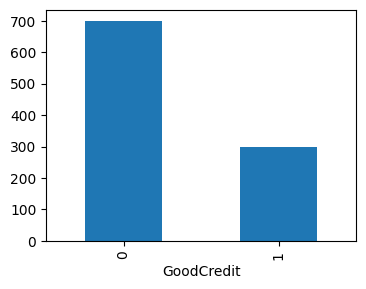

RandomForestClassifier(max_depth=10)
without weights
Classification report:                precision    recall  f1-score   support

           0       0.81      0.91      0.86       214
           1       0.68      0.47      0.55        86

    accuracy                           0.78       300
   macro avg       0.74      0.69      0.70       300
weighted avg       0.77      0.78      0.77       300

[[195  46]
 [ 19  40]]
141


with weights
Classification report:                precision    recall  f1-score   support

           0       0.74      0.96      0.84       214
           1       0.65      0.17      0.28        86

    accuracy                           0.74       300
   macro avg       0.70      0.57      0.56       300
weighted avg       0.72      0.74      0.68       300

[[206  71]
 [  8  15]]
111


with weights (alternative)
Classification report:                precision    recall  f1-score   support

           0       0.76      0.96      0.85       214
           1  

In [ ]:
# Imports
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

# ======================================================================================================= #
# ======================================================================================================= #
# ======================== RANDOM FOREST - Sampling ===================================================== #
# ======================================================================================================= #
# ======================================================================================================= #
print("===============================================================")
print("========= RANDOM FOREST - Weights =============================")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df1 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Random Forest (Bagging of multiple Decision Trees)
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

print("without weights")
model = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights")
# now create the sample weights according to y
weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 1
weights[np.where(y_train == 0)] = 4
model = clf.fit(X_train, y_train, weights)
pred_test = clf.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights (alternative)")
clf.class_weight = {0: 4, 1: 1}
model1 = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - Random Forest - Weights ===========================")
print("===============================================================")

**Comments:**

In this method we apply weights first in target variable (y) in training data for both 2 classes and after that we apply weights as an another method in both 2 classes in the beginning, before training.

In the first method we can see a small improvement in cost. We have a decrease fron 141 to 111. Also we have the same decrease in the second method that it was mentioned above.


LINEAR SVM - Using sample weights

========= LINEAR SVM - Minimizing the expected cost ===========


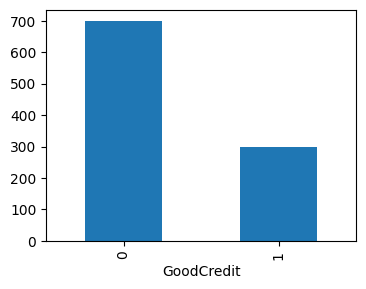

SVC(kernel='linear', probability=True)
without weights
Classification report:                precision    recall  f1-score   support

           0       0.81      0.86      0.83       214
           1       0.58      0.50      0.54        86

    accuracy                           0.75       300
   macro avg       0.70      0.68      0.68       300
weighted avg       0.74      0.75      0.75       300

[[183  43]
 [ 31  43]]
198


with weights


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report:                precision    recall  f1-score   support

           0       0.71      1.00      0.83       214
           1       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

[[214  86]
 [  0   0]]
86


with weights (alternative)
Classification report:                precision    recall  f1-score   support

           0       0.71      1.00      0.83       214
           1       0.00      0.00      0.00        86

    accuracy                           0.71       300
   macro avg       0.36      0.50      0.42       300
weighted avg       0.51      0.71      0.59       300

[[214  86]
 [  0   0]]
86

======END - Naive Bayes - Weights =============================


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Imports
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= LINEAR SVM - Minimizing the expected cost ===========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df2 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# Support Vector Machines(SVM)
clf = SVC(kernel='linear', probability=True)

# Printing all the parameters of SVM
print(clf)

print("without weights")
model = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights")
# now create the sample weights according to y
weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 1
weights[np.where(y_train == 0)] = 4
model = clf.fit(X_train, y_train, weights)
pred_test = clf.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights (alternative)")
clf.class_weight = {0: 4, 1: 1}
model1 = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - Naive Bayes - Weights =============================")
print("===============================================================")

**Comments:**

In linear SVM we have a better improvement regarding cost in comparison with Random forest. We have a decrease from 198 to 86. So this method works better with this model.



NAIVE BAYES - Using sample weights

========= LINEAR SVM - Minimizing the expected cost ===========


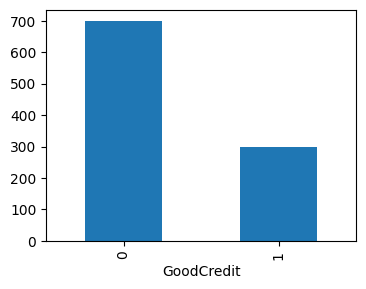

GaussianNB()
without weights
Classification report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.60      0.54        86

    accuracy                           0.71       300
   macro avg       0.66      0.68      0.67       300
weighted avg       0.73      0.71      0.72       300

[[161  34]
 [ 53  52]]
299


with weights
Classification report:                precision    recall  f1-score   support

           0       0.79      0.82      0.81       214
           1       0.51      0.47      0.49        86

    accuracy                           0.72       300
   macro avg       0.65      0.64      0.65       300
weighted avg       0.71      0.72      0.72       300

[[176  46]
 [ 38  40]]
236


with weights (alternative)
Classification report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       214
           1       0.50      0.60     

In [ ]:
# Imports
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn import metrics, svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

print("===============================================================")
print("========= LINEAR SVM - Minimizing the expected cost ===========")
print("===============================================================")

CreditRiskData = pd.read_csv("CreditRiskData.csv", encoding='latin')
df2 = pd.DataFrame(CreditRiskData)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
# print(CreditRiskData.head(10))

# ------------ Defining the problem statement: ----------------
# - Target Variable: GoodCredit
# - Predictors: duration, history, purpose, amount, savings etc.
#
# - GoodCredit=1 means the loan was a good decision.
# - GoodCredit=0 means the loan was a bad decision.
# -------------------------------------------------------------.

# Looking at the distribution of Target variable
# Creating Bar chart as the Target variable is Categorical
GroupedData = CreditRiskData.groupby('GoodCredit').size()
GroupedData.plot(kind='bar', figsize=(4, 3))
plt.show()

# ----------- Converting Ordinal variables to numeric using business mapping -------
# Treating the Ordinal variable first
CreditRiskData['employ'].replace({'A71': 1, 'A72': 2, 'A73': 3, 'A74': 4, 'A75': 5}, inplace=True)

# ---------- Converting the binary nominal variable to numeric using 1/0 mapping ---
# Treating the binary nominal variable
CreditRiskData['foreign'].replace({'A201': 1, 'A202': 0}, inplace=True)

# print(CreditRiskData)


# ======================================================================================================= #
# ======================================================================================================= #
# ===================================== PRE PROCESSING ================================================== #
# ======================================================================================================= #
# ======================================================================================================= #


# ---------- Converting nominal variables to numeric using get_dummies() -----------
# Treating all the nominal variables at once using dummy variables
CreditRiskData_Numeric = pd.get_dummies(CreditRiskData)

# Separate Target Variable and Predictor Variables
TargetVariable = 'GoodCredit'
Predictors = ['employ', 'foreign', 'age', 'amount', 'duration', 'checkingstatus_A11',
              'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
              'history_A30', 'history_A31', 'history_A32', 'history_A33',
              'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
              'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
              'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
              'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
              'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
              'others_A102', 'others_A103', 'property_A121', 'property_A122',
              'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
              'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

X = CreditRiskData_Numeric[Predictors].values
y = CreditRiskData_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# create the cost-matrix
cost_m = [[0, 1],
          [5, 0]]

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
# clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

print("without weights")
model = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights")
# now create the sample weights according to y
weights = np.zeros(y_train.shape[0])
weights[np.where(y_train == 1)] = 1
weights[np.where(y_train == 0)] = 4
model = clf.fit(X_train, y_train, weights)
pred_test = clf.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("\nwith weights (alternative)")
clf.class_weight = {0: 4, 1: 1}
model1 = clf.fit(X_train, y_train)
pred_test = model.predict(X_test)
print("Classification report: ", classification_report(y_test, pred_test))
conf_m = confusion_matrix(y_test, pred_test).T  # transpose to align with slides
print(conf_m)
loss = np.sum(conf_m * cost_m)
print("%d\n" % loss)

print("===============================================================")
print("======END - Naive Bayes - Weights =============================")
print("===============================================================")

**Comments:**

Regarding Naive Bayes model it has same behaviour with Random forest. Here we don't have a significant improvement, just a small decrease in cost.

So in general we can consider that weghting method about minimizing cost is working perfect only with linear SVM model.

**Generally:**

If we compare the results of three methods in the three models, we can consider that the most good improvement can be shown in method "minimizing expected cost".

Other than that, another consideration that is useful to be mentioned is that in method "minimizng expected cost" the best results can be found when we apply it in naive bayes model. In addition, regarding sampling method, results as not as good as we expected and finally in weighting method as it mentioned above best results can be found when we apply it in linear SVM model.
